<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/mnist_FeedFoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Descrição da Tarefa



Partindo do notebook utlilizado na aula passada, que pode ser encontrado no link abaixo (para quem não veio):

https://github.com/rdsmaia/dim0494/blob/main/notebooks/hands_on_keras.ipynb

Faça:

1) projete uma rede neural com somente camadas do tipo feed-forward (dense) para resolver o problema.

2) compare a acurácia da rede feed-forward com a rede CNN. Como a rede feed-forward compara-se com a CNN em termos de número de parâmetros e tempo de treinamento?

3) Utilize callbacks para salvar a história do treinamento e plotar gráficos da evolução do erro para as duas redes. Plote os erros de treinamento e validação a cada época: curvas de aprendizado.

opcional 4) Seria possível utilizar uma rede com camadas recorrentes para reconhecer dígitos escritos?

Opções para envio da tarefa:

notebook;

link;

pdf;

mostrar em sala.

# Import


In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
%load_ext tensorboard

In [3]:
# Clean Up Cell
# Do Not run
#rm -rf ./logs/ *.h5
#%tensorboard --logdir logs/cnn/train

# Data Handling


In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
def class_arrays(index):
  return X_train[y_train==index], y_train[y_train==index]

separeted_classes_dictionary = {0: [], 1: [], 
                                2: [], 3: [],
                                4: [], 5: [],
                                6: [], 7: [],
                                8: [], 9: []}

for it in range(10):
  separeted_classes_dictionary[it] = class_arrays(it)

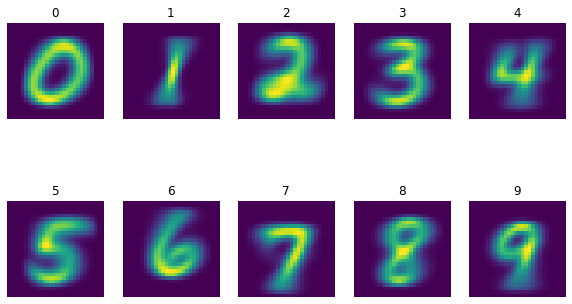

In [6]:
fig = plt.figure(figsize=(10, 6))
for it in range(10):
  plt.subplot(2, 5, it+1)
  plt.axis('off')
  plt.title(it)
  plt.imshow(separeted_classes_dictionary[it][0].mean(axis=0).squeeze())

In [7]:
num_classes = 10
input_shape = (28, 28, 1)

In [8]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# drsmaia CNN

In [10]:
'''
Same CNN Model.
Used as reference 
'''
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./cnn/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/cnn/'),
]

In [12]:
# Hyperparameters
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
cnn_fit = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 46s 107ms/step - loss: 0.3638 - accuracy: 0.8884 - val_loss: 0.0813 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 46s 108ms/step - loss: 0.1118 - accuracy: 0.9657 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0844 - accuracy: 0.9736 - val_loss: 0.0473 - val_accuracy: 0.9887
Epoch 4/15
422/422 [==============================] - 46s 110ms/step - loss: 0.0723 - accuracy: 0.9772 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0575 - accuracy: 0.9823 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0376 - val_ac

# FeedFoward


In [13]:
feed_foward_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(8, activation="sigmoid"),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

feed_foward_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 28, 28, 16)        32        
                                                                 
 dense_2 (Dense)             (None, 28, 28, 8)         136       
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_1 (Dropout)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,898
Trainable params: 62,898
Non-trainable params: 0
_________________________________________________________________


In [14]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./feed_foward/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/feed_foward/'),
]

In [15]:
# Hyperparameters
batch_size = 128
epochs = 15
feed_foward_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
feed_foward_fit = feed_foward_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 18s 42ms/step - loss: 2.2553 - accuracy: 0.2250 - val_loss: 1.1197 - val_accuracy: 0.8097
Epoch 2/15
422/422 [==============================] - 17s 41ms/step - loss: 0.6871 - accuracy: 0.8017 - val_loss: 0.3502 - val_accuracy: 0.9013
Epoch 3/15
422/422 [==============================] - 17s 41ms/step - loss: 0.4482 - accuracy: 0.8645 - val_loss: 0.2890 - val_accuracy: 0.9162
Epoch 4/15
422/422 [==============================] - 17s 41ms/step - loss: 0.3963 - accuracy: 0.8818 - val_loss: 0.2724 - val_accuracy: 0.9212
Epoch 5/15
422/422 [==============================] - 19s 44ms/step - loss: 0.3703 - accuracy: 0.8915 - val_loss: 0.2592 - val_accuracy: 0.9262
Epoch 6/15
422/422 [==============================] - 18s 42ms/step - loss: 0.3563 - accuracy: 0.8946 - val_loss: 0.2506 - val_accuracy: 0.9303
Epoch 7/15
422/422 [==============================] - 18s 42ms/step - loss: 0.3469 - accuracy: 0.8987 - val_loss: 0.2461 - val_accuracy:

# Plots


In [26]:
#TensorBoard
#Trying to call multiples logs in signle Tensorboard 
#%tensorboard --logdir=logs/cnn/train 
#%tensorboard --logdir=logs/cnn/validation
#feed_train:logs/feed_foward/train/, 
#feed_validation:logs/feed_foward/validation

##### CNN Plots


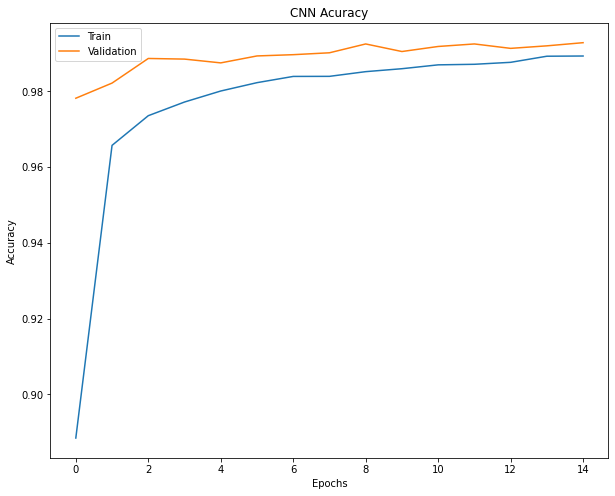

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(cnn_fit.history['accuracy'], label='Train')
ax = plt.plot(cnn_fit.history['val_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.title('CNN Acuracy')
ax = plt.legend()

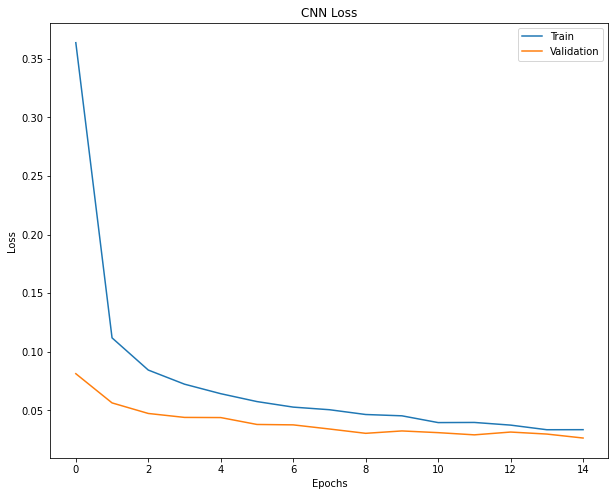

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(cnn_fit.history['loss'], label='Train')
ax = plt.plot(cnn_fit.history['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Loss')
ax = plt.title('CNN Loss')
ax = plt.legend()

#### Feed Foward Plots


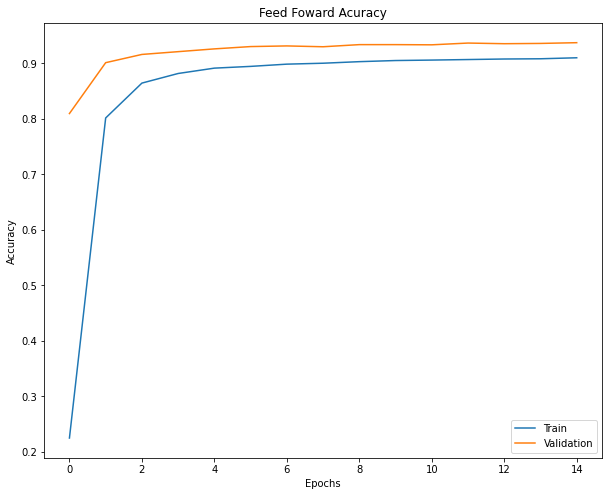

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(feed_foward_fit.history['accuracy'], label='Train')
ax = plt.plot(feed_foward_fit.history['val_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.title('Feed Foward Acuracy')
ax = plt.legend()

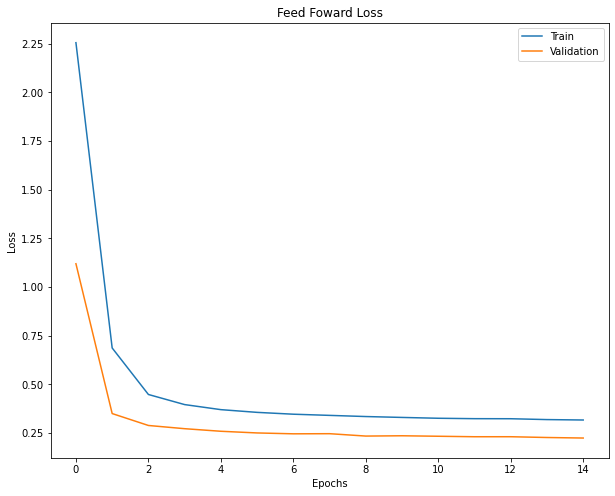

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(feed_foward_fit.history['loss'], label='Train')
ax = plt.plot(feed_foward_fit.history['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Loss')
ax = plt.title('Feed Foward Loss')
ax = plt.legend()